### Importing Librareis

In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [79]:
data = pd.read_csv('apple_stocks.csv')

### Data Check

In [80]:
display(data.head())

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782
2,5-Jul-17,143.69,144.79,142.72,144.09,21569557
3,3-Jul-17,144.88,145.30,143.10,143.50,14277848
4,30-Jun-17,144.45,144.96,143.78,144.02,23024107


In [81]:

display(data.tail())

,Date,Open,High,Low,Close,Volume
124,9-Jan-17,117.95,119.43,117.94,118.99,33561948
125,6-Jan-17,116.78,118.16,116.47,117.91,31751900
126,5-Jan-17,115.92,116.86,115.81,116.61,22193587
127,4-Jan-17,115.85,116.51,115.75,116.02,21118116
128,3-Jan-17,115.80,116.33,114.76,116.15,28781865


In [82]:
data.describe()

,Open,High,Low,Close,Volume
count,129.000000,129.000000,129.000000,129.000000,1.290000e+02
mean,139.826977,140.683953,139.050155,139.975349,2.706259e+07
std,11.007846,11.009166,10.705675,10.781804,1.202048e+07
min,115.800000,116.330000,114.760000,116.020000,1.424635e+07
25%,135.670000,136.270000,135.100000,135.720000,2.035000e+07
50%,142.110000,142.920000,141.110000,142.270000,2.357509e+07
75%,145.740000,147.140000,144.940000,145.870000,3.037938e+07
max,156.010000,156.650000,155.050000,156.100000,1.119850e+08


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    129 non-null    object 
 1   Open    129 non-null    float64
 2   High    129 non-null    float64
 3   Low     129 non-null    float64
 4   Close   129 non-null    float64
 5   Volume  129 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ KB


In [84]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

### Data Preprocessing

In [85]:
# Convert ‘Date’ to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

In [86]:
data['Date'].head()

0   2017-07-07
1   2017-07-06
2   2017-07-05
3   2017-07-03
4   2017-06-30
Name: Date, dtype: datetime64[ns]

In [87]:
# Handle missing values

data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [88]:
# Engineer features like daily returns

data['Daily Returns'] = data['Close'].pct_change()

In [89]:
display(data.head())

,Date,Open,High,Low,Close,Volume,Daily Returns
0,2017-07-07,142.90,144.75,142.90,144.18,19201712,NaN
1,2017-07-06,143.02,143.50,142.41,142.73,24128782,-0.010057
2,2017-07-05,143.69,144.79,142.72,144.09,21569557,0.009528
3,2017-07-03,144.88,145.30,143.10,143.50,14277848,-0.004095
4,2017-06-30,144.45,144.96,143.78,144.02,23024107,0.003624


In [90]:
data['Daily Returns'].fillna(data['Daily Returns'].mean(), inplace=True)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           129 non-null    datetime64[ns]
 1   Open           129 non-null    float64       
 2   High           129 non-null    float64       
 3   Low            129 non-null    float64       
 4   Close          129 non-null    float64       
 5   Volume         129 non-null    int64         
 6   Daily Returns  129 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 7.2 KB


In [92]:
# Numerical Fratures to Scaler

numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Returns']

In [93]:
scaler = StandardScaler()

In [94]:
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [95]:
data[numerical_features]

,Open,High,Low,Close,Volume,Daily Returns
0,0.280255,0.370773,0.361010,0.391497,-0.656507,0.000000
1,0.291199,0.256788,0.315061,0.256487,-0.245019,-0.800931
2,0.352302,0.374420,0.344131,0.383117,-0.458754,1.060861
3,0.460828,0.420926,0.379764,0.328182,-1.067727,-0.234161
4,0.421613,0.389922,0.443530,0.376599,-0.337277,0.499550
...,...,...,...,...,...,...
124,-1.995147,-1.938096,-1.979554,-1.953955,0.542799,0.059309
125,-2.101849,-2.053904,-2.117399,-2.054515,0.391631,-0.707726
126,-2.180279,-2.172447,-2.179289,-2.175558,-0.406638,-0.892996
127,-2.186663,-2.204363,-2.184915,-2.230493,-0.496457,-0.325888


In [96]:
# Define a target variable (e.g., price increase or decrease).

data['Target'] = (data['Close'].diff() > 0).astype(int)

In [97]:
data.head()

,Date,Open,High,Low,Close,Volume,Daily Returns,Target
0,2017-07-07,0.280255,0.370773,0.361010,0.391497,-0.656507,0.000000,0
1,2017-07-06,0.291199,0.256788,0.315061,0.256487,-0.245019,-0.800931,0
2,2017-07-05,0.352302,0.374420,0.344131,0.383117,-0.458754,1.060861,1
3,2017-07-03,0.460828,0.420926,0.379764,0.328182,-1.067727,-0.234161,0
4,2017-06-30,0.421613,0.389922,0.443530,0.376599,-0.337277,0.499550,1


In [98]:
data.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Daily Returns    0
Target           0
dtype: int64

### Split the Data

In [99]:
X = data.drop(columns=['Target', 'Date'])
y = data['Target']

In [100]:
X.head()

,Open,High,Low,Close,Volume,Daily Returns
0,0.280255,0.370773,0.361010,0.391497,-0.656507,0.000000
1,0.291199,0.256788,0.315061,0.256487,-0.245019,-0.800931
2,0.352302,0.374420,0.344131,0.383117,-0.458754,1.060861
3,0.460828,0.420926,0.379764,0.328182,-1.067727,-0.234161
4,0.421613,0.389922,0.443530,0.376599,-0.337277,0.499550


In [101]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Target, dtype: int32

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Define the Random Forest Classifier

In [103]:
rfc = RandomForestClassifier(random_state=42)

### Hyperparameter Tuning

In [104]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### GridSearchCV for Tuning

In [105]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [106]:
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [107]:
# Fit GridSearchCV

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [108]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [109]:
# Use the best estimator to make predictions
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier

RandomForestClassifier(n_estimators=50, random_state=42)

### Cross-Validation

In [110]:
k = 5
cv_scores = cross_val_score(rfc, X, y, cv=k)

In [111]:
cv_scores

array([1.  , 1.  , 1.  , 1.  , 0.84])

### Train the Final Model

In [112]:
best_rfc = RandomForestClassifier(random_state=42, **best_params)

In [113]:
best_rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

### Predictions on Test Set

In [114]:
y_pred = best_rfc.predict(X_test)

In [115]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1])

### Metrics and Report

In [116]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [117]:
print(f"The Accuracy Score is {accuracy:.2f}")
print(f"The Precision Score is {precision}")
print(f"The F1 Score is {f1}")
print(f"The Recall Score is {recall:.2f}")

The Accuracy Score is 0.96
The Precision Score is 1.0
The F1 Score is 0.96
The Recall Score is 0.92


In [118]:
clf_report = classification_report(y_test, y_pred)

In [119]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



In [136]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0],
       [ 1, 12]], dtype=int64)

### ROC Curve and AUC

In [122]:
y_pred_prob = best_rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


In [123]:
y_pred_prob

array([0.08, 0.02, 0.88, 0.92, 0.04, 0.96, 0.96, 0.  , 0.82, 0.04, 0.  ,
       0.88, 0.88, 0.9 , 0.02, 0.  , 0.96, 0.08, 0.12, 0.94, 0.08, 0.14,
       0.12, 1.  , 0.06, 0.9 ])

In [126]:
print(f"The ROC AUC Value is {roc_auc:.2f}")

The ROC AUC Value is 0.99


### Plot ROC Curve

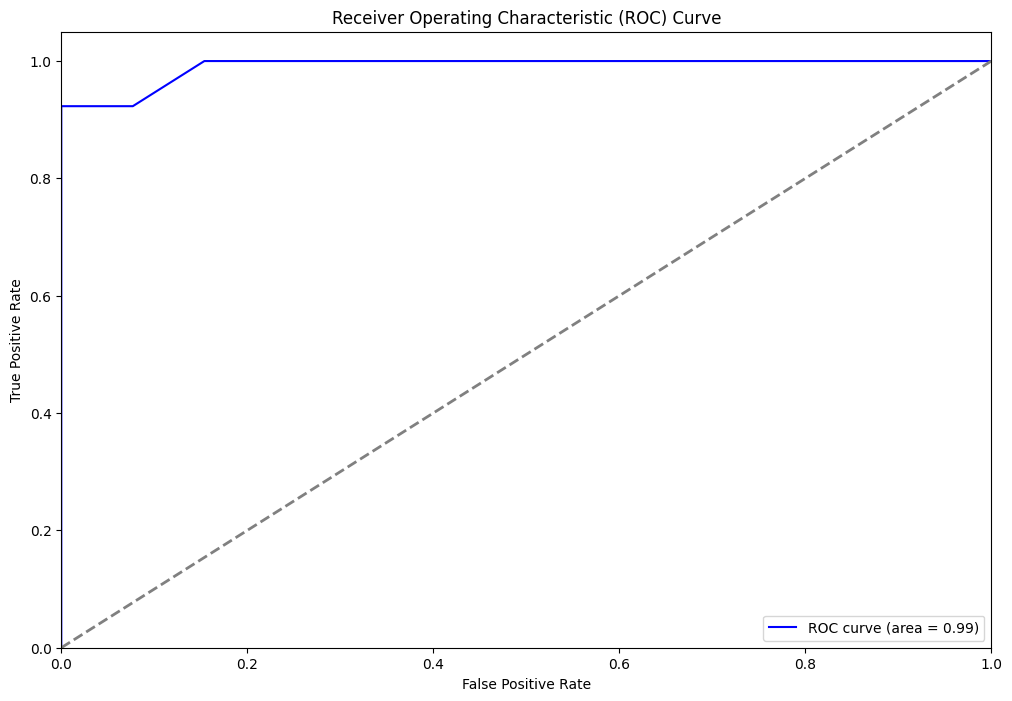

In [133]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color = 'blue', label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color = 'gray', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()